# Nepal EarthQuake Project:  
https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/#metric  
This is Richter's Predictor: Modeling Earthquake Damage
Can you predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal based on aspects of building location and construction?  
We're trying to predict the ordinal variable <span style="color:red">damage_grade</span>, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

1 -> represents low damage  
2 -> represents a medium amount of damage  
3 -> represents almost complete destruction  

### Feature Description:  
<span style="color:orange">geo_level_1_id, geo_level_2_id, geo_level_3_id</span> (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567. 
   
<span style="color:orange">count_floors_pre_eq</span> (type: int): number of floors in the building before the earthquake.  
  
<span style="color:orange">age</span> (type: int): age of the building in years.  
  
<span style="color:orange">area_percentage</span> (type: int): normalized area of the building footprint.  
  
<span style="color:orange">height_percentage</span> (type: int): normalized height of the building footprint.  
  
<span style="color:orange">land_surface_condition</span> (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.  
  
<span style="color:orange">foundation_type</span> (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.  
  
<span style="color:orange">roof_type</span> (type: categorical): type of roof used while building. Possible values: n, q, x.  
  
<span style="color:orange">ground_floor_type</span> (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.  
  
<span style="color:orange">other_floor_type</span> (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.  
  
<span style="color:orange">position</span> (type: categorical): position of the building. Possible values: j, o, s, t.  
  
<span style="color:orange">plan_configuration</span> (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.  
  
<span style="color:orange">has_superstructure_adobe_mud</span> (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.  
  
<span style="color:orange">has_superstructure_mud_mortar_stone</span> (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.  
  
<span style="color:orange">has_superstructure_stone_flag</span> (type: binary): flag variable that indicates if the superstructure was made of Stone.  
  
<span style="color:orange">has_superstructure_cement_mortar_stone</span> (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.  
  
<span style="color:orange">has_superstructure_mud_mortar_brick</span> (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.  
  
<span style="color:orange">has_superstructure_cement_mortar_brick</span> (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.  
  
<span style="color:orange">has_superstructure_timber</span> (type: binary): flag variable that indicates if the superstructure was made of Timber.  
  
<span style="color:orange">has_superstructure_bamboo</span> (type: binary): flag variable that indicates if the superstructure was made of Bamboo.  
  
<span style="color:orange">has_superstructure_rc_non_engineered</span> (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.  
  
<span style="color:orange">has_superstructure_rc_engineered</span> (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.  
  
<span style="color:orange">has_superstructure_other</span> (type: binary): flag variable that indicates if the superstructure was made of any other material. 
   
<span style="color:orange">legal_ownership_status</span> (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.  
  
<span style="color:orange">count_families</span> (type: int): number of families that live in the building.  
  
<span style="color:orange">has_secondary_use</span> (type: binary): flag variable that indicates if the building was used for any secondary purpose.  
  
<span style="color:orange">has_secondary_use_agriculture</span> (type: binary): flag variable that indicates if the building was used for agricultural purposes.  
  
<span style="color:orange">has_secondary_use_hotel</span> (type: binary): flag variable that indicates if the building was used as a hotel.  
  
<span style="color:orange">has_secondary_use_rental</span> (type: binary): flag variable that indicates if the building was used for rental purposes.  
  
<span style="color:orange">has_secondary_use_institution</span> (type: binary): flag variable that indicates if the building was used as a location of any institution.  
  
<span style="color:orange">has_secondary_use_school</span> (type: binary): flag variable that indicates if the building was used as a school.  
  
<span style="color:rorangeed">has_secondary_use_industry</span> (type: binary): flag variable that indicates if the building was used for industrial purposes.  
  
<span style="color:orange">has_secondary_use_health_post</span> (type: binary): flag variable that indicates if the building was used as a health post.  
  
<span style="color:orange">has_secondary_use_gov_office</span> (type: binary): flag variable that indicates if the building was used fas a government office.  
  
<span style="color:orange">has_secondary_use_use_police</span> (type: binary): flag variable that indicates if the building was used as a police station.  
  
<span style="color:orange">has_secondary_use_other</span> (type: binary): flag variable that indicates if the building was secondarily used for other purposes.  
  

In [122]:
# let's import our champion libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
# IMPORT THE dataset
nepal = pd.read_csv("Nepal_earthquake/train_values.csv")
nepal_labels = pd.read_csv("Nepal_earthquake/train_labels.csv")
nepal.sample()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
64461,815724,17,303,4121,2,10,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0


In [124]:
nepal_labels.sample()

,building_id,damage_grade
229499,336981,2


In [125]:
# checking the dataset diemntion
print(nepal.shape)
print(nepal_labels.shape)

(260601, 39)
(260601, 2)


In [126]:
nepal['damage_grade'] = nepal_labels['damage_grade']

In [127]:
nepal.sample()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
162498,955483,19,354,9018,2,30,3,5,n,r,...,0,0,0,0,0,0,0,0,0,2


<Axes: title={'center': 'Number of Buildings with Each Damage Grade'}, xlabel='damage_grade'>

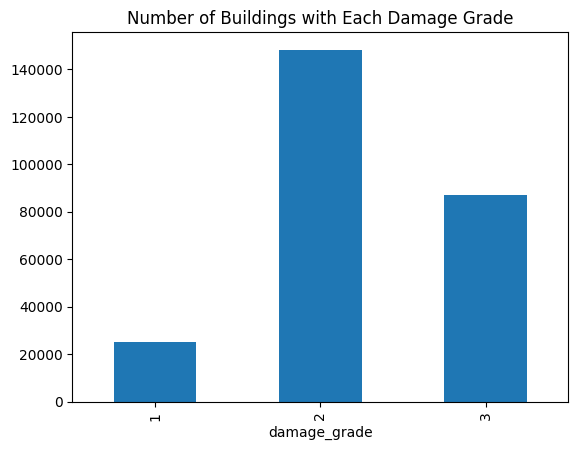

In [128]:
(nepal_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

In [129]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [130]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2018))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2018))])

In [131]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

In [132]:
selected_features = ['area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = nepal[selected_features]

In [133]:
train_values_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 4 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   area_percentage                         260601 non-null  int64
 1   height_percentage                       260601 non-null  int64
 2   count_floors_pre_eq                     260601 non-null  int64
 3   has_superstructure_cement_mortar_stone  260601 non-null  int64
dtypes: int64(4)
memory usage: 8.0 MB


### Trying with Vaex for faster result; Today I want to achieve 65% accuracy

In [134]:
import vaex 

In [135]:
vaex_df = vaex.from_pandas(nepal)
# making new vaex datasets
vaex_df.export_hdf5("Nepal_earthquake/train_values_large.hdf5")
# loading the new dataframe vaex format
vaex_nepal = vaex.open("Nepal_earthquake/train_values_large.hdf5")

In [136]:
# checking the dataset diemntion
print(vaex_nepal.shape)

(260601, 40)


#### Want to calculate feature importance

In [137]:
# first lets do Labelencoding of categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in nepal.columns:
    if nepal[col].dtype == "object":
        nepal[col] = le.fit_transform(nepal[col])
nepal.sample()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
177802,970796,22,1136,5551,2,30,7,5,0,2,...,0,0,0,0,0,0,0,0,0,2


In [138]:
y = nepal['damage_grade']
X = nepal.drop('damage_grade', axis=1)

In [144]:
vaex_df = vaex.from_pandas(nepal)
# making new vaex datasets
vaex_df.export_hdf5("Nepal_earthquake/feature_selection.hdf5")
# loading the new dataframe vaex format
vaex_feature = vaex.open("Nepal_earthquake/feature_selection.hdf5")

In [174]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2018))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2018))])

In [175]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

In [179]:
from vaex.ml.sklearn import Predictor

model = RandomForestClassifier()

features = X.columns.to_list()

vaex_model = Predictor(features=features, target='damage_grade', model=model, batch_size=50000)
vaex_model.fit(df=vaex_feature)

In [180]:
# get all feature importnace values
all_features = model.feature_importances_
# get all important features positions in the array
indices = np.where(all_features > 0.01)[0]
# select the most important features
important_features = [vaex_feature.column_names[i] for i in indices]
important_features


['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_timber',
 'count_families']

In [182]:
new_features = important_features[1:len(important_features)]
vaex_model = Predictor(features=new_features, target='damage_grade', model=gs, batch_size=50000)
vaex_model.fit(df=vaex_feature)

In [183]:
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__n_estimators': 100}

In [184]:
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(vaex_feature[new_features])
f1_score(nepal_labels['damage_grade'].values, in_sample_preds, average='micro')

/Users/solo/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.8079324331065498

### Time to do the same for test dataset fro Submission

In [187]:
import warnings
warnings.filterwarnings("ignore")

test_values = pd.read_csv("Nepal_earthquake/test_values.csv", index_col='building_id')
test_subset = test_values[new_features]
for col in test_subset.columns:
    if test_subset[col].dtype == "object":
        test_subset[col] = le.fit_transform(test_subset[col])
test_subset.sample()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_mud_mortar_stone,has_superstructure_timber,count_families
building_id,,,,,,,,,,,,,,,,
42477,10,76,2145,2,10,11,6,2,2,0,2,1,2,0,0,1


In [189]:
vaex_test = vaex.from_pandas(test_subset)
# making new vaex datasets
vaex_test.export_hdf5("Nepal_earthquake/test_data.hdf5")
# loading the new dataframe vaex format
vaex_testing = vaex.open("Nepal_earthquake/test_data.hdf5")

In [190]:
predictions = gs.predict(vaex_testing)

In [193]:
submission_format = pd.read_csv('Nepal_earthquake/submission_format.csv', index_col='building_id')

In [194]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [195]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [196]:
my_submission.to_csv('submission.csv')

In [197]:
!head submission.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,1
421793,3
871976,2
691228,1
896100,3
343471,2


In [ ]:
vaex_labels_df = vaex.from_pandas(nepal_labels)
# making new vaex datasets
vaex_labels_df.export_hdf5("Nepal_earthquake/train_labels_large.hdf5")
# loading the new dataframe vaex format
vaex_nepal_labels = vaex.open("Nepal_earthquake/train_labels_large.hdf5")

In [ ]:
nepal_labels['damage_grade'].values

array([3, 2, 3, ..., 3, 2, 3])

In [169]:
from sklearn.metrics import f1_score

in_sample_preds = model.predict(vaex_nepal[features])
f1_score(nepal_labels['damage_grade'].values, in_sample_preds, average='micro')

/Users/solo/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: Cannot cast 'building_id' (of type int64) to dtype('float32')

In [ ]:
from vaex.ml.sklearn import IncrementalPredictor
from sklearn.linear_model import SGDClassifier

df = vaex.datasets.iris()

features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
target = 'class_'

model = SGDClassifier(learning_rate='constant', eta0=0.0001, random_state=42)
vaex_model = IncrementalPredictor(features=features, target=target, model=model,
                                  batch_size=500_000, partial_fit_kwargs={'classes':[0, 1, 2]})

vaex_model.fit(df=df, progress='widget')

### Trying with IncrementalPredictor method

In [ ]:
pipe = make_pipeline(StandardScaler(), 
                     SGDClassifier(random_state=42))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [ ]:
param_grid = {
    'alpha': [1e-4, 1e-2, 1e-1, 1e0], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'n_jobs': [-1]
}
gs = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:
from vaex.ml.sklearn import IncrementalPredictor

model = SGDClassifier(learning_rate='constant', alpha=1e-4, eta0=0.0001, random_state=42)

features = ['area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'has_superstructure_cement_mortar_stone']

vaex_model = IncrementalPredictor(features=features, target='damage_grade', model=model, batch_size=50_000,
                                  partial_fit_kwargs={'classes':[1, 2, 3]})
vaex_model.fit(df=train_values_subset, progress='widget')

In [ ]:
from sklearn.metrics import f1_score

in_sample_preds = model.predict(vaex_nepal[features])
f1_score(nepal_labels['damage_grade'].values, in_sample_preds, average='micro')

/Users/solo/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


0.5689118614280068